In [126]:
from sklearn.datasets import make_blobs

In [127]:
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

In [128]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [141]:
def normDist(x1, x2):
    dist = np.linalg.norm(x1 - x2)
    return dist

In [143]:
def cluster(x, k, centroids):
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, 2), dtype=float)
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        print ("\n\n====== Iteration {} ======".format(iter))
        # STEP 1: assign to closer cluster
        for i in range(row):
            minDist = np.inf 
            minIndex = -1   
            for j in range(k):
                distJI = normDist(centroids[j], x[i])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
#             print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
            clusterAssigned[i] = [minIndex, minDist]   #-----changed
#         print ("\n.....Assigned clusters: \n {}".format(clusterAssigned))
        # STEP 2: update centroids
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        # STEP 3: see if centroids is updated. STOP if NOT updated
        comparison = np.equal(centroids, _centroids) 
        if(comparison.all() == True):
            print ("\n.....NOT Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            centroids = _centroids
            iter += 1

In [146]:
def draw(x, centroids):
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [131]:
# 초기 중심점 4개 설정
samplex= random.sample(list(X), 4)
samplex= [samplex[0][0], samplex[1][0], samplex[2][0], samplex[3][0]]
sampley= random.sample(list(y), 4)
sample=[]
for i in range(4):
    sample.append([samplex[i], sampley[i]])
print(sample)

[[-1.9367369661928118, 1], [-1.8688014798168289, 0], [1.356177616962864, 3], [-1.5859755278771648, 2]]


초기 중심점 설정을 dataset 중 랜덤으로 잡아서 설정했었는데, 10000번 넘게 돌아도 수렴이 되지 않아 강의자료를 참고하여 중심점을 설정하였습니다.

In [145]:
k=4
centroids = np.array([[-3,3], [-3,8], [2,4], [2,1]], dtype = float)
centorids, clusterAssigned= cluster(X, k, centroids)



====== Iteration 1 ======

.....Updating Centroids
 [[-3.  3.]
 [-3.  8.]
 [ 2.  4.]
 [ 2.  1.]] => 
[[-1.63043905  3.09879034]
 [-1.27208964  7.74944718]
 [ 0.78627354  4.2491454 ]
 [ 1.97918933  0.97920012]]


====== Iteration 2 ======

.....Updating Centroids
 [[-1.63043905  3.09879034]
 [-1.27208964  7.74944718]
 [ 0.78627354  4.2491454 ]
 [ 1.97918933  0.97920012]] => 
[[-1.5772186   3.11456071]
 [-1.27208964  7.74944718]
 [ 0.83044547  4.27831711]
 [ 1.97918933  0.97920012]]


====== Iteration 3 ======

.....NOT Updating Centroids
 [[-1.5772186   3.11456071]
 [-1.27208964  7.74944718]
 [ 0.83044547  4.27831711]
 [ 1.97918933  0.97920012]] => 
[[-1.5772186   3.11456071]
 [-1.27208964  7.74944718]
 [ 0.83044547  4.27831711]
 [ 1.97918933  0.97920012]]


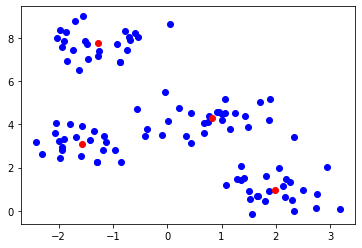

In [148]:
draw(X, centorids)